In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import pandas as pd

import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.utils import shuffle

#Read imageset and label set from .npy files
###images are saves as 2d array
#####level4->[0][0-99] level3->[1][0-99]
###labels are saved as 1d array


[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3]


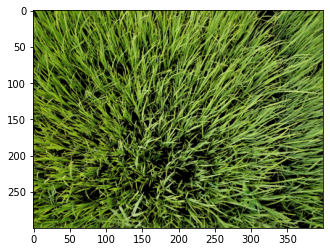

In [27]:
labels = np.load("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_in_csv/labeldata.npy")
print(labels)
images = np.load("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_in_csv/imageArray.npy")
plt.imshow(images[1][99])
plt.show()

#getting mean of rgb of an image

In [53]:
img1=images[0][50][40][40][0]
img1
rgbarr = [[0]*4]*5
rgbarr[0][1]=5;
print(rgbarr)

[[0, 5, 0, 0], [0, 5, 0, 0], [0, 5, 0, 0], [0, 5, 0, 0], [0, 5, 0, 0]]


In [86]:
#img1=images[0][50][40][40]#1->level 2->image matrix 3->row 4-> column
levelcnt=images.shape[0]
imgcnt=images.shape[1]
rowcnt=images.shape[2]
colcnt=images.shape[3]
rgbarr1=np.zeros((imgcnt,3))
rgbarr2=np.zeros((imgcnt,3))
#rgbarr = [[[0]*3]*imgcnt]*levelcnt
for i in range (levelcnt):
  for j in range(imgcnt):
    r=0
    b=0
    g=0
    nonzerocnt=0;
    for k in range(rowcnt):
      for l in range(colcnt):
        if not(images[i][j][k][l][0]==0 and images[i][j][k][l][1]==0 and images[i][j][k][l][2]==0):
          #print(images[i][j][k][l])
          nonzerocnt+=1
          r+=images[i][j][k][l][0];
          g+=images[i][j][k][l][1];
          b+=images[i][j][k][l][2];#we dont remove images..just removing pixels..so rgbarr size no need to change
    if(i==0):
      rgbarr1[j][0]=r/nonzerocnt;
      rgbarr1[j][1]=g/nonzerocnt;
      rgbarr1[j][2]=b/nonzerocnt;   
    if(i==1):
      rgbarr2[j][0]=r/nonzerocnt;
      rgbarr2[j][1]=g/nonzerocnt;
      rgbarr2[j][2]=b/nonzerocnt; 
   

In [107]:
rgbarr=np.concatenate([rgbarr1,rgbarr2])
df=pd.DataFrame(data=rgbarr[0:]) 

X=df[0:]
a=np.full(shape=150, fill_value=4,dtype=np.int)
b=np.full(shape=150, fill_value=3,dtype=np.int)
Y=np.concatenate([a,b])
df

,0,1,2
0,79.521870,109.512877,37.915592
1,75.679507,105.365517,36.042771
2,73.817239,103.502585,34.868638
3,74.141495,102.659802,39.490112
4,73.841558,102.396006,38.074632
...,...,...,...
295,82.922128,107.908789,40.339710
296,84.418836,109.509127,39.081773
297,86.110217,111.422111,39.987098
298,86.746274,112.395923,41.679606


In [108]:
X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.2, random_state=42)

In [109]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train, y_train) #need scalar to fit

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [110]:
predicted=clf.predict(X_test)

In [111]:
len=y_test.size;
count=0;
for i in range (len):
  if(y_test[i]==predicted[i]):
    count+=1
accuracy=count/len;
print("Accuracy on test set: ",accuracy*100,"%")

Accuracy on test set:  93.33333333333333 %
